<a href="https://colab.research.google.com/github/Arthur6363/Deep-Learning-ML/blob/main/Keras_LSTM_ile_Zaman_Serisi_Tahmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [61]:
df = pd.read_csv("/content/AirPassengers.csv")

In [62]:
df.head(15)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [63]:
df.tail(10)

,Month,#Passengers
134,1960-03,419
135,1960-04,461
136,1960-05,472
137,1960-06,535
138,1960-07,622
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [64]:
len(df)

144

In [65]:
type(df)

pandas.core.frame.DataFrame

In [66]:
df = df["#Passengers"]
df.head

<bound method NDFrame.head of 0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: #Passengers, Length: 144, dtype: int64>

In [67]:
df = np.array(df).reshape(-1,1)

In [68]:
type(df)

numpy.ndarray

<function matplotlib.pyplot.show(close=None, block=None)>

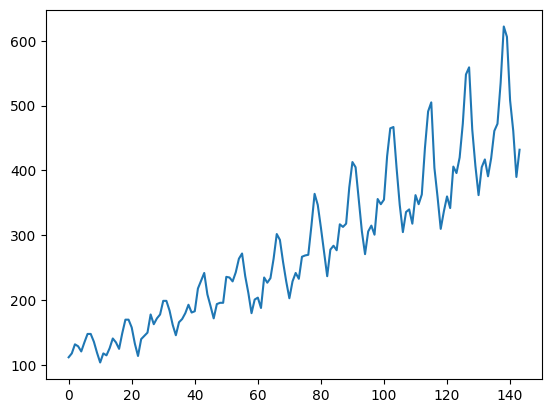

In [69]:
plt.plot(df)
plt.show

In [70]:
sc = MinMaxScaler()
df = sc.fit_transform(df)

In [71]:
train = df[0:100,:]
test = df[100:,:]

In [72]:
def veri(df, steps):
  dfx=[]
  dfy=[]
  for i in range(len(df)-steps-1):
    a = df[i:(i+steps),0]
    dfx.append(a)
    dfy.append(df[i+steps,0])
  return np.array(dfx), np.array(dfy)

In [73]:
steps = 3

In [74]:
x_train,y_train = veri(train, steps)
x_test, y_test = veri(test,steps)

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],1,x_train.shape[1]))
x_test = np.reshape(x_train,(x_test.shape[0],1,x_test.shape[1]))

In [87]:
model = Sequential()
model.add(LSTM(128,input_shape=(1,steps)))
model.add(Dense(64))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

In [88]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128)               67584     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 75905 (296.50 KB)
Trainable params: 75905 (296.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [89]:
model.fit(x_train,y_train, epochs=23 ,batch_size=1)

Epoch 1/23
96/96 [==============================] - 3s 3ms/step - loss: 0.0104 - accuracy: 0.0104
Epoch 2/23
96/96 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 0.0104
Epoch 3/23
96/96 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 0.0104
Epoch 4/23
96/96 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 0.0104
Epoch 5/23
96/96 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 0.0104
Epoch 6/23
96/96 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 0.0104
Epoch 7/23
96/96 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 0.0104
Epoch 8/23
96/96 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 0.0104
Epoch 9/23
96/96 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 0.0104
Epoch 10/23
96/96 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 0.0104
Epoch 11/23
96/96 [

In [93]:
print(x_test.shape)

(40, 3)


In [94]:
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

In [95]:
y_pred = model.predict(x_test)

2/2 [==============================] - 1s 12ms/step


In [96]:
y_pred = sc.inverse_transform(y_pred)
y_test = y_test.reshape(-1,1)
y_test = sc.inverse_transform(y_test)

<function matplotlib.pyplot.show(close=None, block=None)>

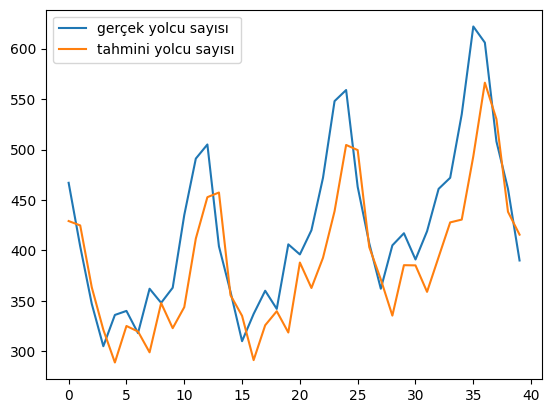

In [97]:
plt.plot(y_test, label="gerçek yolcu sayısı")
plt.plot(y_pred, label="tahmini yolcu sayısı")
plt.xlabel = ("hafta")
plt.ylabel= ("yolcu sayısı")
plt.legend()
plt.show()